In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import EfficientNetB6
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
train_path = 'D:\\chest_xray\\train'
valid_path = 'D:\\chest_xray\\test'

In [5]:
# add preprocessing layer to the front of VGG
efficient = EfficientNetB6(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in efficient.layers:
  layer.trainable = False

In [7]:
folders = glob('D:\\chest_xray\\train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(efficient.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=efficient.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
163/163 [==============================] - 643s 4s/step - loss: 8.2545 - accuracy: 0.6240 - val_loss: 10.6314 - val_accuracy: 0.6250
Epoch 2/80
163/163 [==============================] - 703s 4s/step - loss: 5.2613 - accuracy: 0.6192 - val_loss: 3.5962 - val_accuracy: 0.6250
Epoch 3/80
163/163 [==============================] - 699s 4s/step - loss: 6.7218 - accuracy: 0.6173 - val_loss: 1.3086 - val_accuracy: 0.3750
Epoch 4/80
163/163 [==============================] - 701s 4s/step - loss: 5.8969 - accuracy: 0.6175 - val_loss: 20.8166 - val_accuracy: 0.6250
Epoch 5/80
163/163 [==============================] - 701s 4s/step - loss: 6.2944 - accuracy: 0.6265 - val_loss: 2.2253 - val_accuracy: 0.3750
Epoch 6/80
163/163 [==============================] - 696s 4s/step - loss: 4.5656 - accuracy: 0.6325 - val_loss: 3.0086 - val_accuracy: 0.6250
Epoch 7/80
163/163 [==============================] - 634s 4s/step - loss: 4.5089 - accuracy: 0.6171 - val_loss: 0.6162 - val_accuracy: 0.62

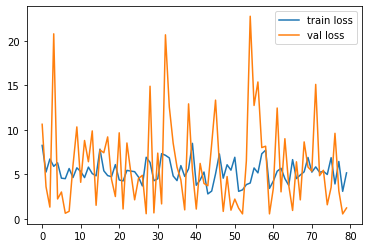

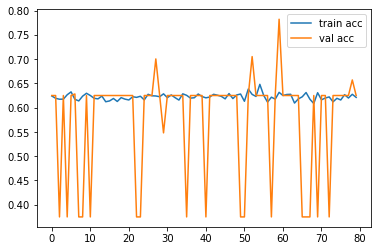

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')